<a href="https://colab.research.google.com/github/Shakilgithub20/predicting_diabetes/blob/main/Diabetes_Prediction_Accuracy_94_46_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv('/content/diabetes.csv')

In [5]:
dataset.head()#viewing the head of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#finding the shape of the dataset
dataset.shape

(768, 9)

In [8]:
#finding out the null values of the dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

(None, None)

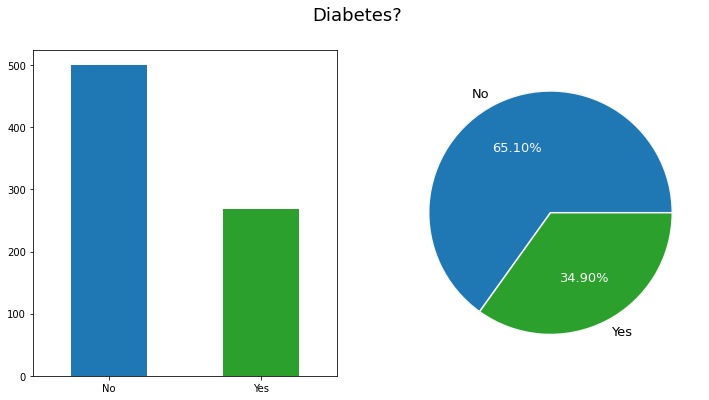

In [9]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Diabetes?", fontsize = 18.)
_ = dataset.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = dataset.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [10]:
#this is also a one way to find the missing values in the dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

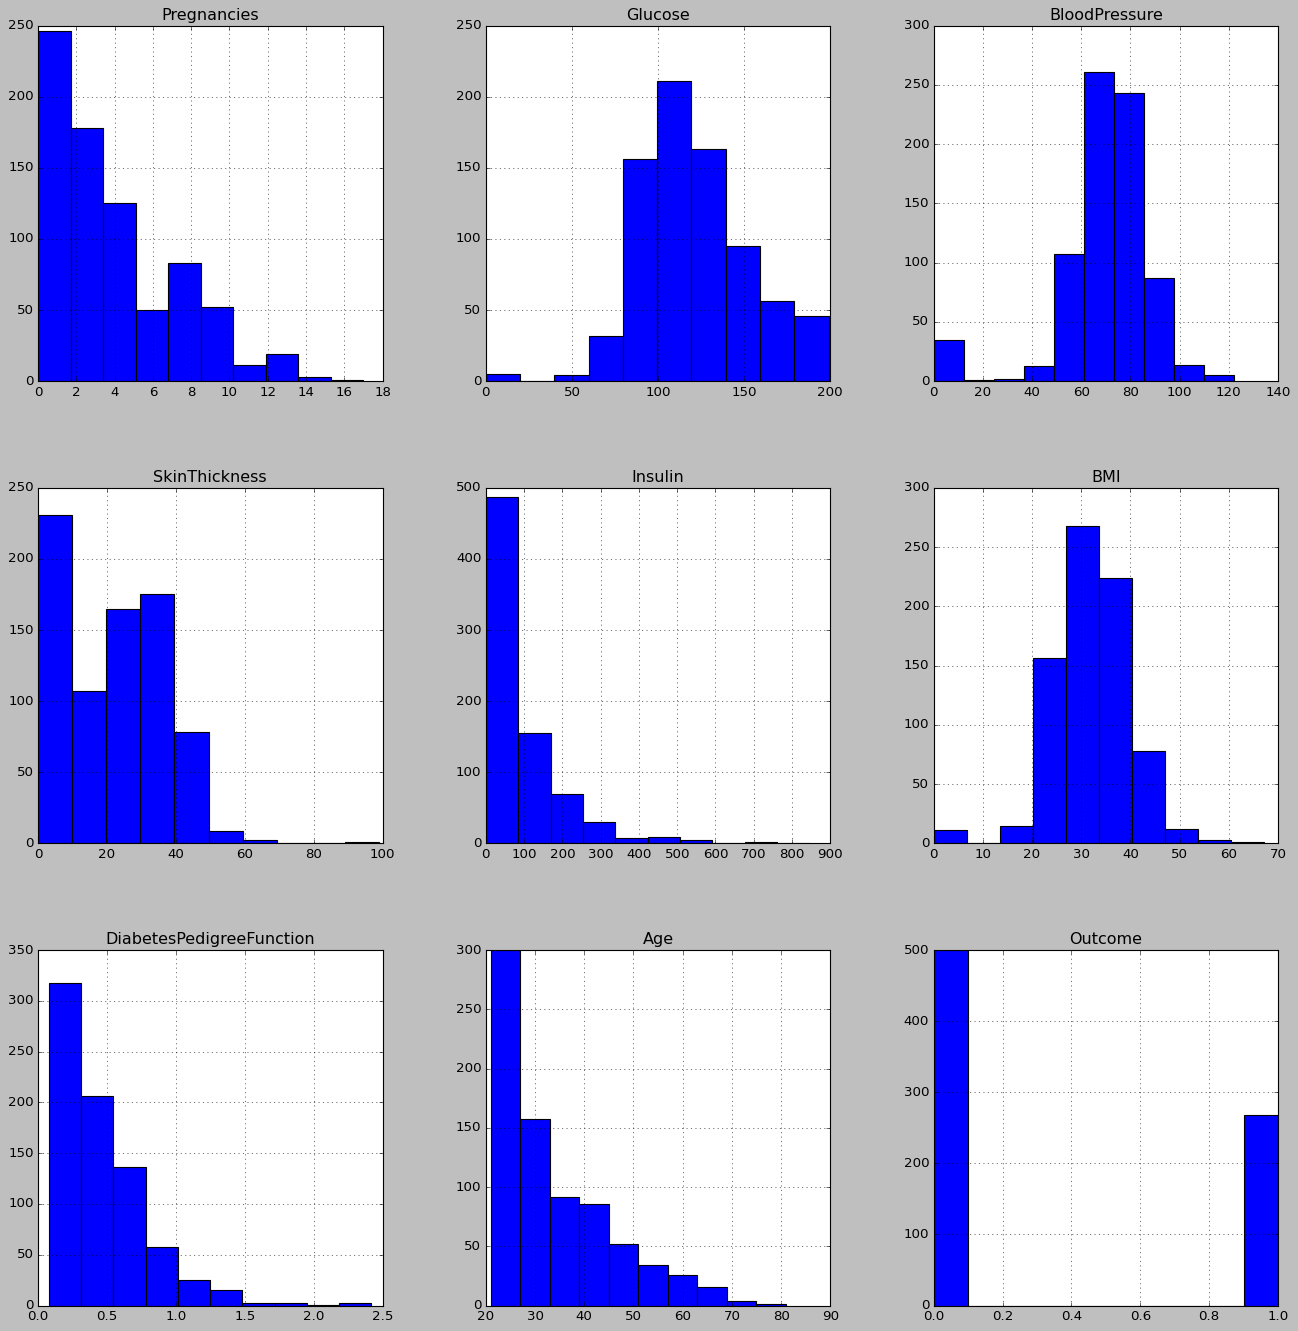

In [12]:
plt.style.use('classic')
plot = dataset.hist(figsize = (20,20))

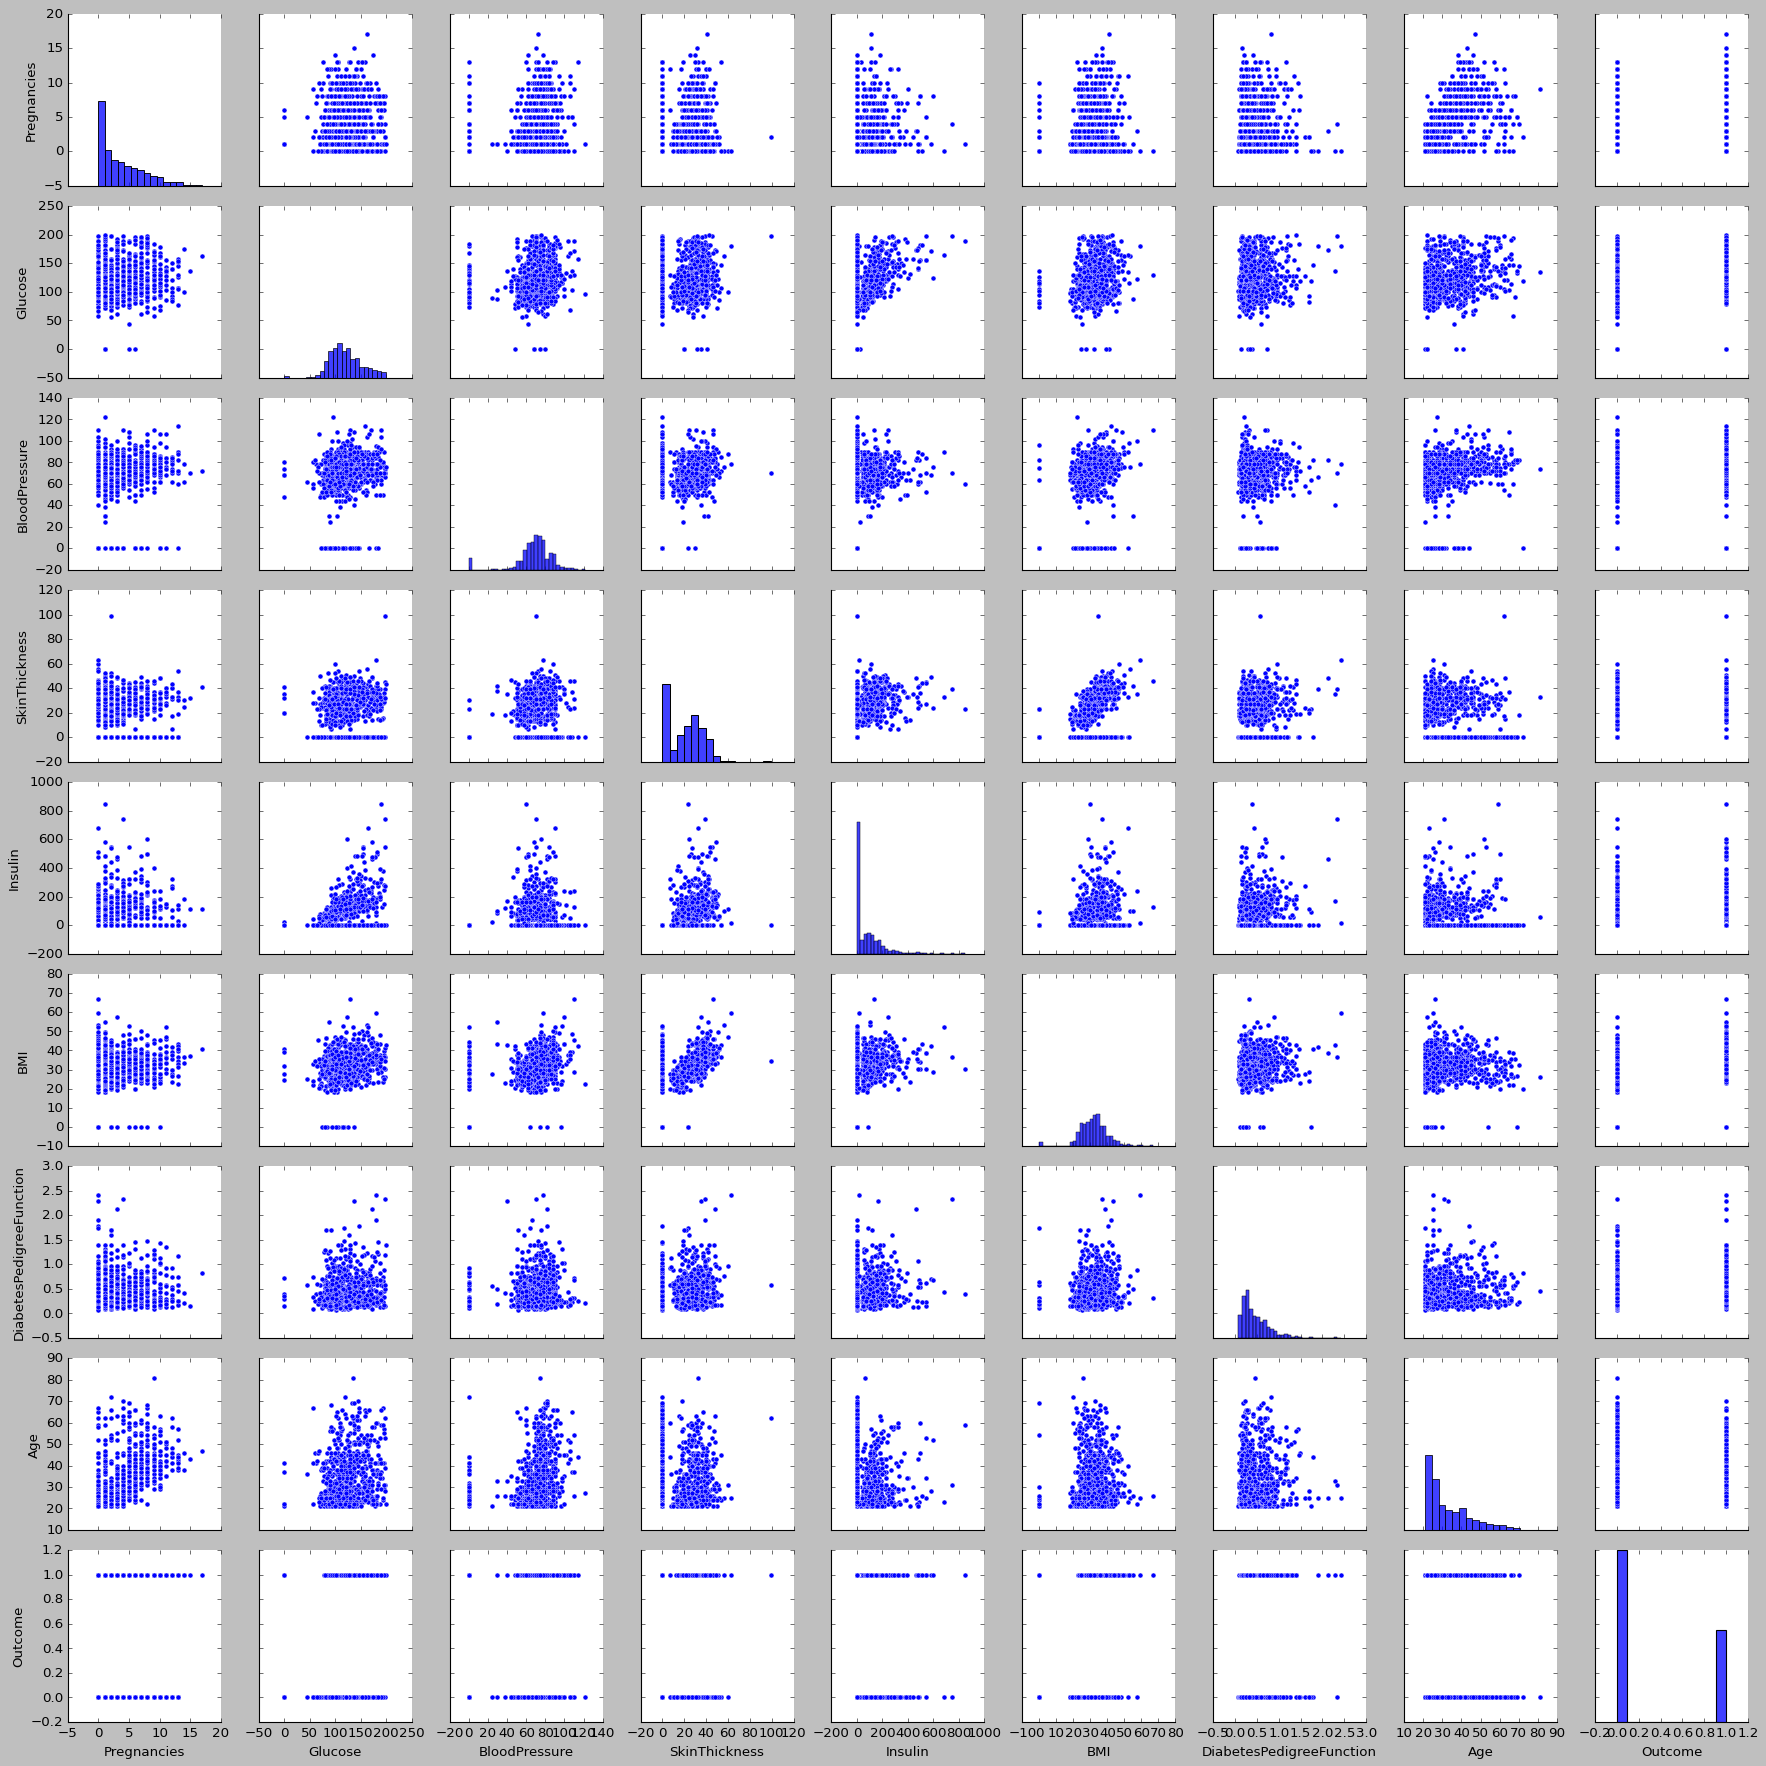

In [13]:
#Scatter matrix of uncleaned data
sns.pairplot(dataset )

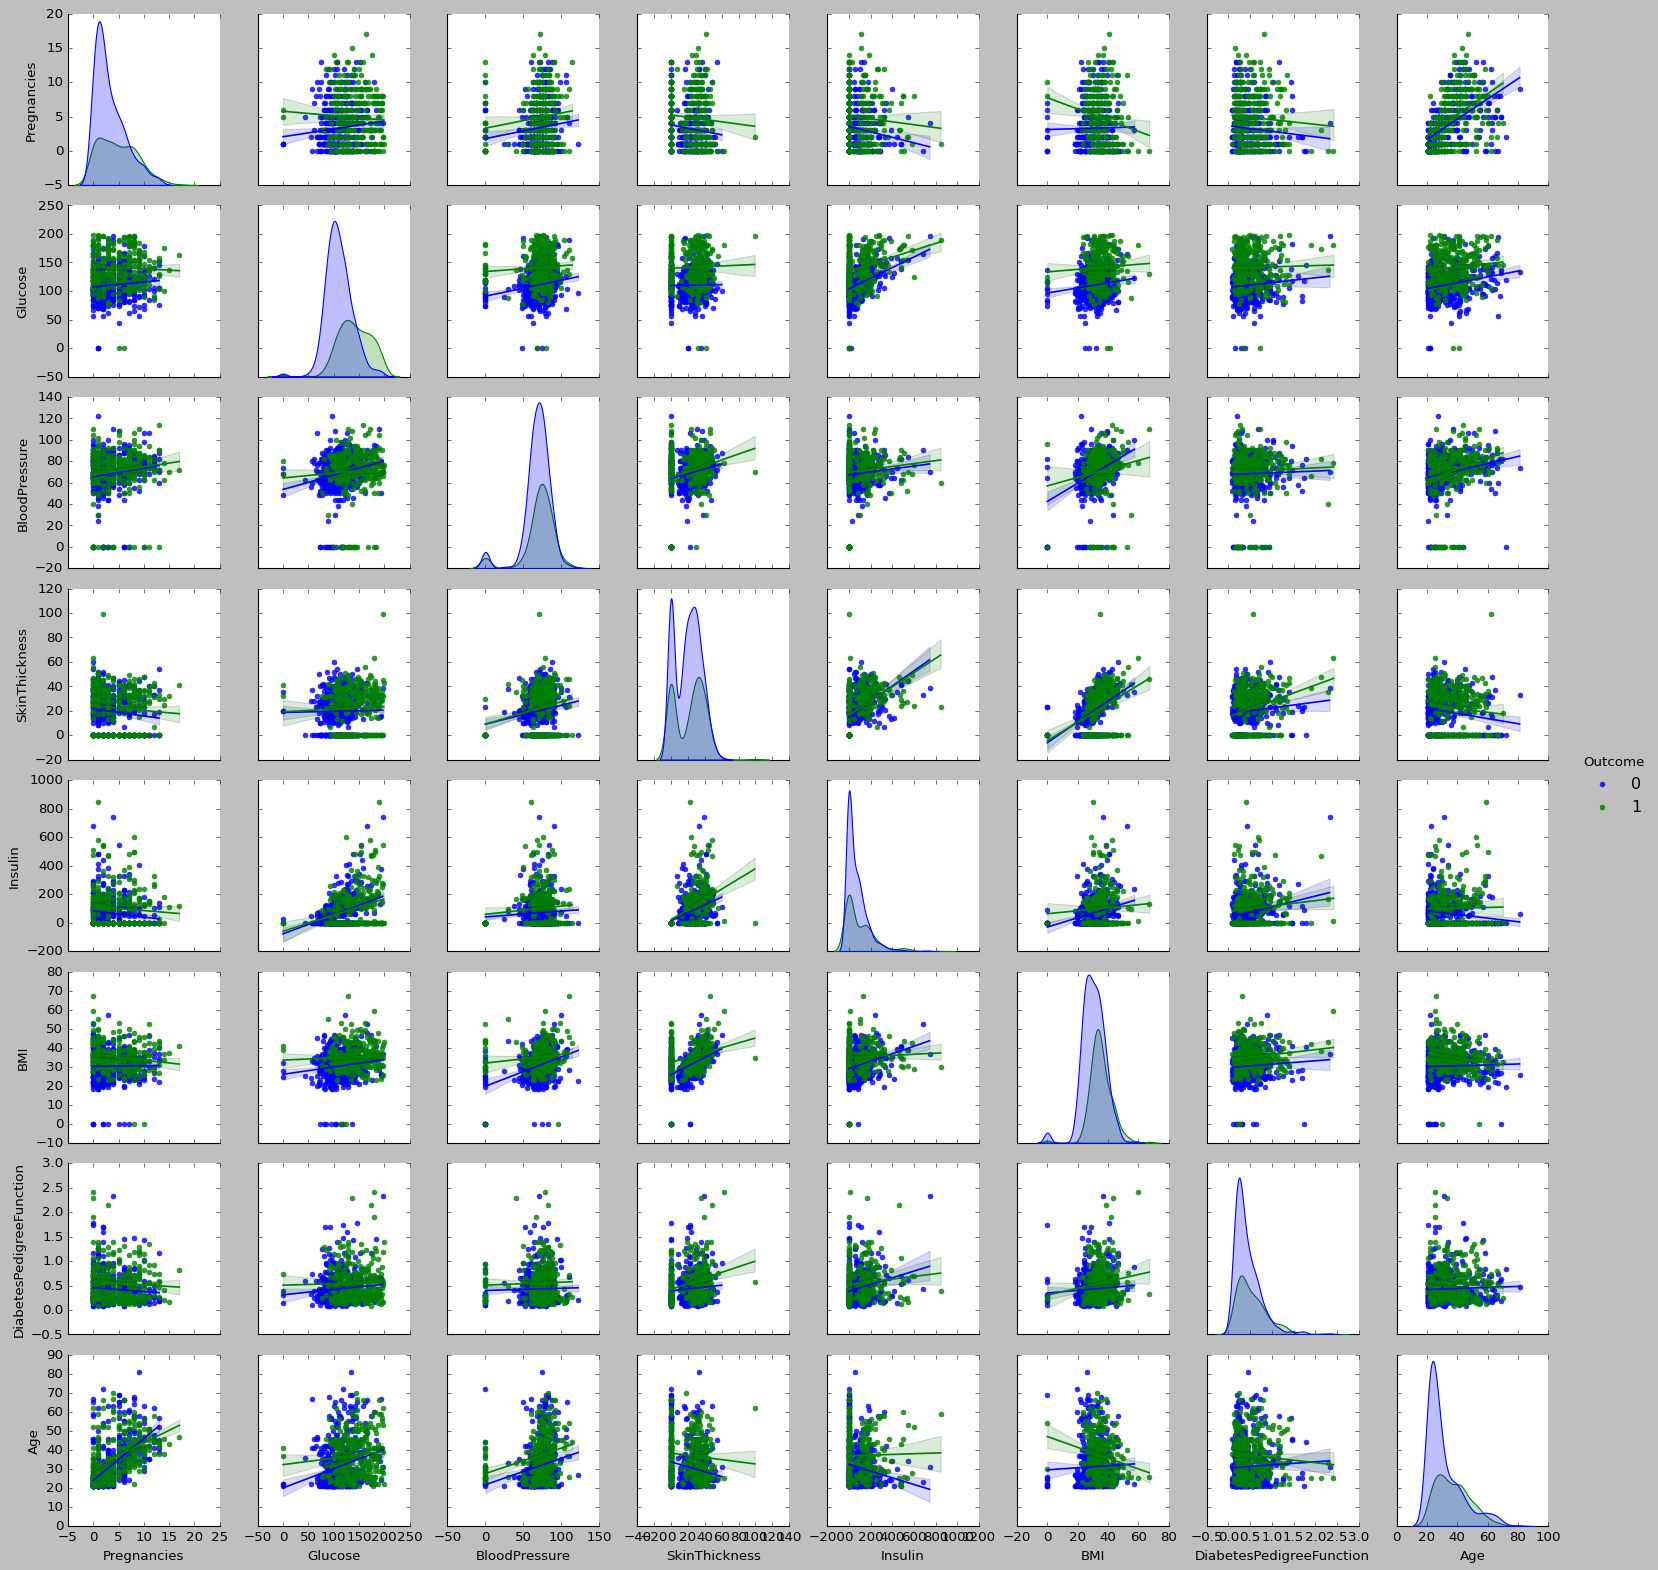

In [14]:
#Pair plot for clean data
sns.pairplot(data=dataset,hue='Outcome',diag_kind='kde', kind="reg")
plt.show()

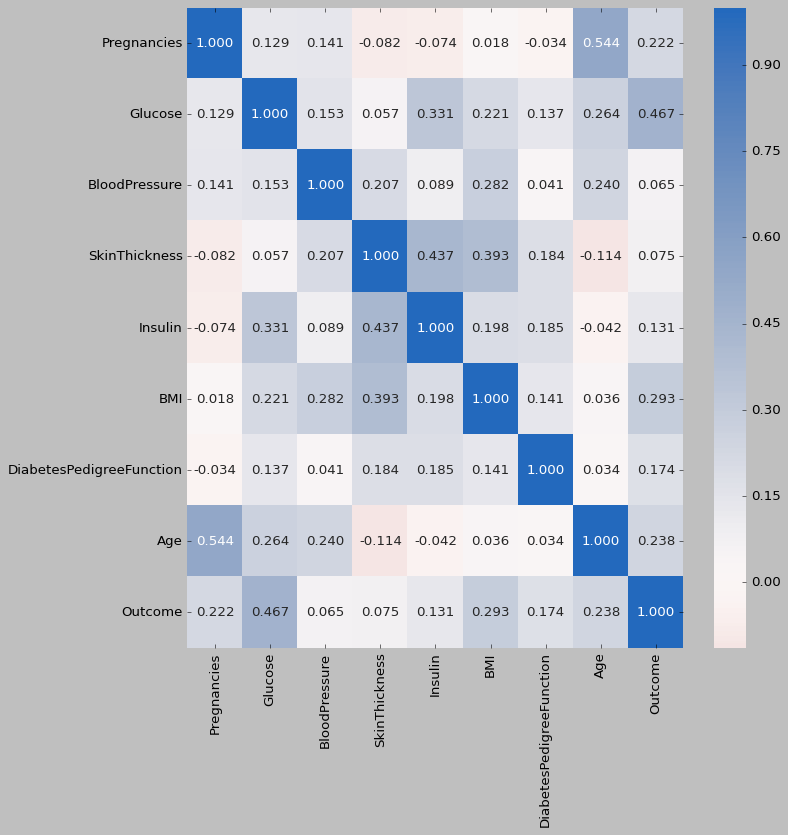

In [15]:
plt.figure(figsize = [10, 10])
sns.heatmap(dataset.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

In [16]:
print(np.array(dataset))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [17]:
# drop columns number 9
train_data_x = dataset.drop(columns = 'Outcome', axis = 1)
train_data_y = dataset['Outcome']

In [18]:
train_Data, test_Data, train_Out, test_Out = train_test_split(train_data_x,train_data_y,test_size=0.2, random_state=10)
print(train_Out)

120    1
172    0
307    0
7      0
448    1
      ..
369    1
320    0
527    0
125    1
265    0
Name: Outcome, Length: 614, dtype: int64


In [19]:
data_model = Sequential()
data_model.add(Dense(100, input_dim=8, activation='sigmoid'))
data_model.add(Dense(50, activation='sigmoid'))
data_model.add(Dense(30, activation='sigmoid'))
data_model.add(Dense(10, activation='sigmoid'))
data_model.add(Dense(1, activation='sigmoid'))

data_model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
print(data_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Compile model
# using opimizer Adam
# using loss binary_crossentropy
# data_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
data_model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

In [21]:
hist = data_model.fit(train_Data, train_Out, validation_data=(test_Data, test_Out), epochs=1000, verbose=1)

Epoch 1/1000
20/20 [==============================] - 4s 12ms/step - loss: 0.8789 - accuracy: 0.3404 - val_loss: 0.7690 - val_accuracy: 0.3831
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.3404 - val_loss: 0.6943 - val_accuracy: 0.3831
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6384 - val_loss: 0.6710 - val_accuracy: 0.6169
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6596 - val_loss: 0.6655 - val_accuracy: 0.6169
Epoch 5/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6596 - val_loss: 0.6653 - val_accuracy: 0.6169
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6596 - val_loss: 0.6666 - val_accuracy: 0.6169
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6596 - val_loss: 0.6677 - val_accuracy: 0.6169
Epoch

In [22]:
# Train and Test accuracy
scores = data_model.evaluate(train_Data,train_Out)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = data_model.evaluate(test_Data,test_Out)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9446
Training Accuracy: 94.46%

5/5 [==============================] - 0s 3ms/step - loss: 1.1029 - accuracy: 0.6299
Testing Accuracy: 62.99%



In [23]:
# Final Prediction
# print(data_model.predict(test_Data))

In [24]:
y_pred = data_model.predict(test_Data)
y_pred = (y_pred > 0.5)
print(data_model.predict(test_Data))

[[0.9723785 ]
 [0.11299576]
 [0.05191848]
 [0.0502142 ]
 [0.0510546 ]
 [0.05022976]
 [0.05174709]
 [0.2233914 ]
 [0.05010685]
 [0.05867384]
 [0.0503573 ]
 [0.64114493]
 [0.98810345]
 [0.99142027]
 [0.06660842]
 [0.8891807 ]
 [0.05015328]
 [0.05010618]
 [0.05009478]
 [0.99892646]
 [0.89426816]
 [0.3862329 ]
 [0.05065809]
 [0.0503502 ]
 [0.05009679]
 [0.22936077]
 [0.05009776]
 [0.05017937]
 [0.95447695]
 [0.27991658]
 [0.05047581]
 [0.05021083]
 [0.05053668]
 [0.05011471]
 [0.06978381]
 [0.06717681]
 [0.05055891]
 [0.5829469 ]
 [0.15289824]
 [0.05030768]
 [0.06842109]
 [0.27053097]
 [0.05011081]
 [0.05126071]
 [0.08216952]
 [0.05009293]
 [0.09476723]
 [0.05114725]
 [0.07133739]
 [0.05162222]
 [0.05766406]
 [0.4894815 ]
 [0.05019057]
 [0.05075838]
 [0.9705601 ]
 [0.05017595]
 [0.07978702]
 [0.05200158]
 [0.13101502]
 [0.0502149 ]
 [0.05018729]
 [0.05024514]
 [0.05009927]
 [0.05029488]
 [0.05052445]
 [0.98123264]
 [0.98625237]
 [0.0569446 ]
 [0.05009431]
 [0.9873117 ]
 [0.05515944]
 [0.99

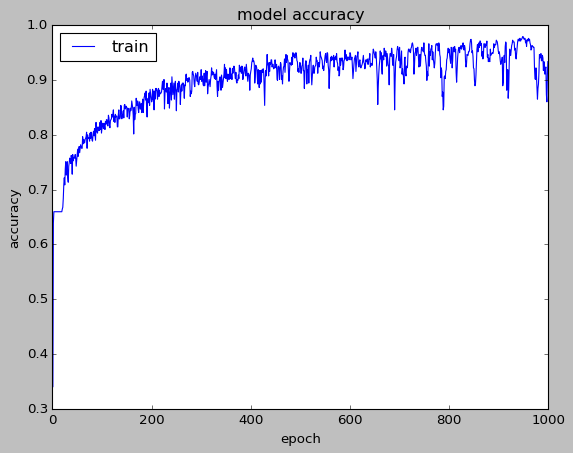

<Figure size 640x480 with 0 Axes>

In [25]:
acc = hist.history['accuracy']
loss = hist.history['loss']
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

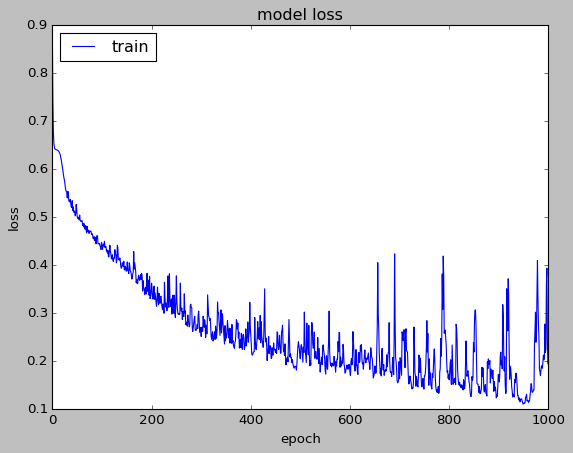

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')